In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler, OneHotEncoder, Binarizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.ensemble import GradientBoostingRegressor

from scipy.optimize import curve_fit


In [36]:
filepath = r'.\data\housing.csv'
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(filepath, sep = '\s+', header = None, names = column_names)
#TODO add metadata for column description 
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

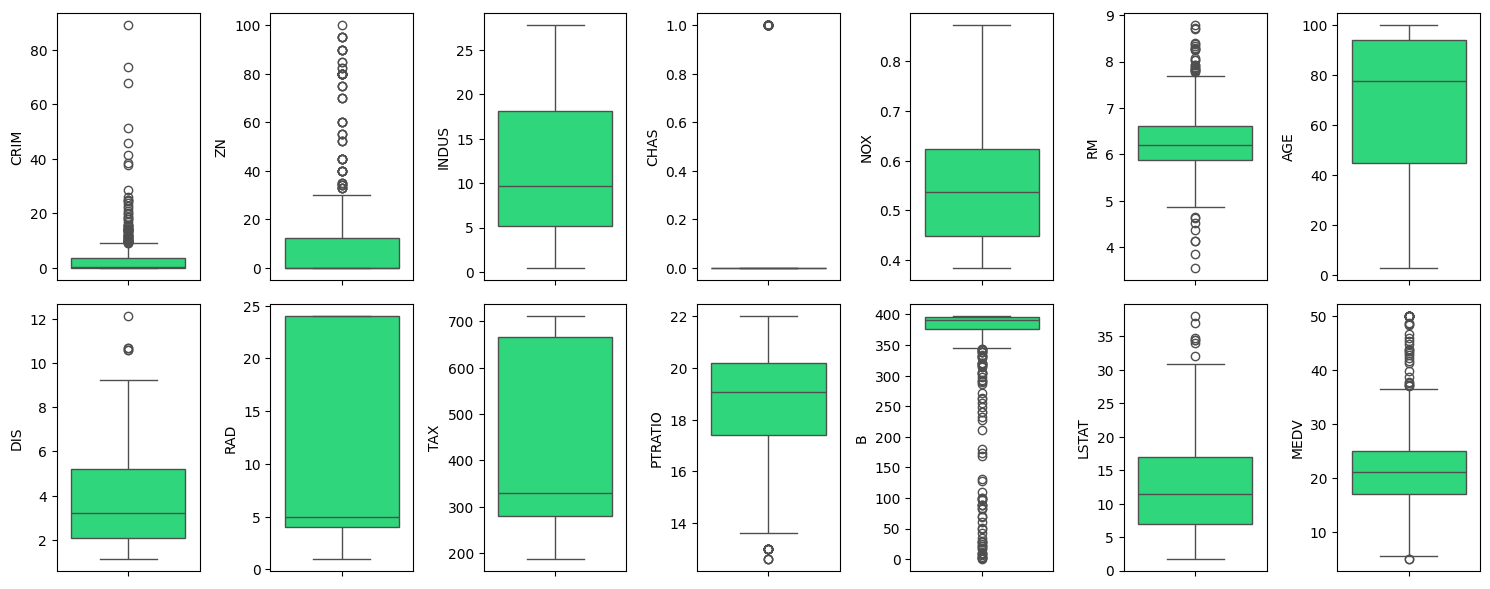

In [6]:
fig, axes = plt.subplots(nrows = 2, ncols = 7, figsize = (15, 6))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.boxplot(y = df[column], data = df, ax = axes[i], color = '#14F278')

plt.tight_layout()
plt.show()

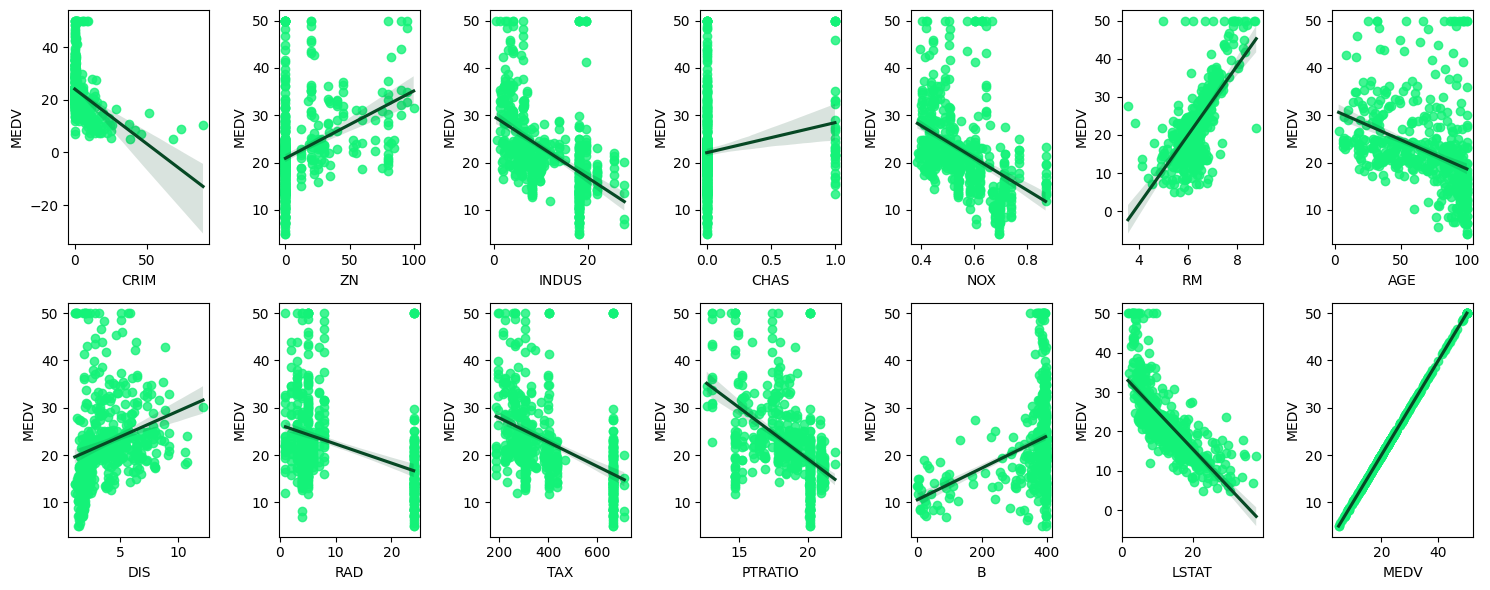

In [7]:
fig, axes = plt.subplots(nrows = 2, ncols = 7, figsize = (15, 6))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.regplot(x = df[column], y = df['MEDV'], data = df, ax = axes[i], color = '#14F278', line_kws = dict(color = '#064824'))

plt.tight_layout()
plt.show()

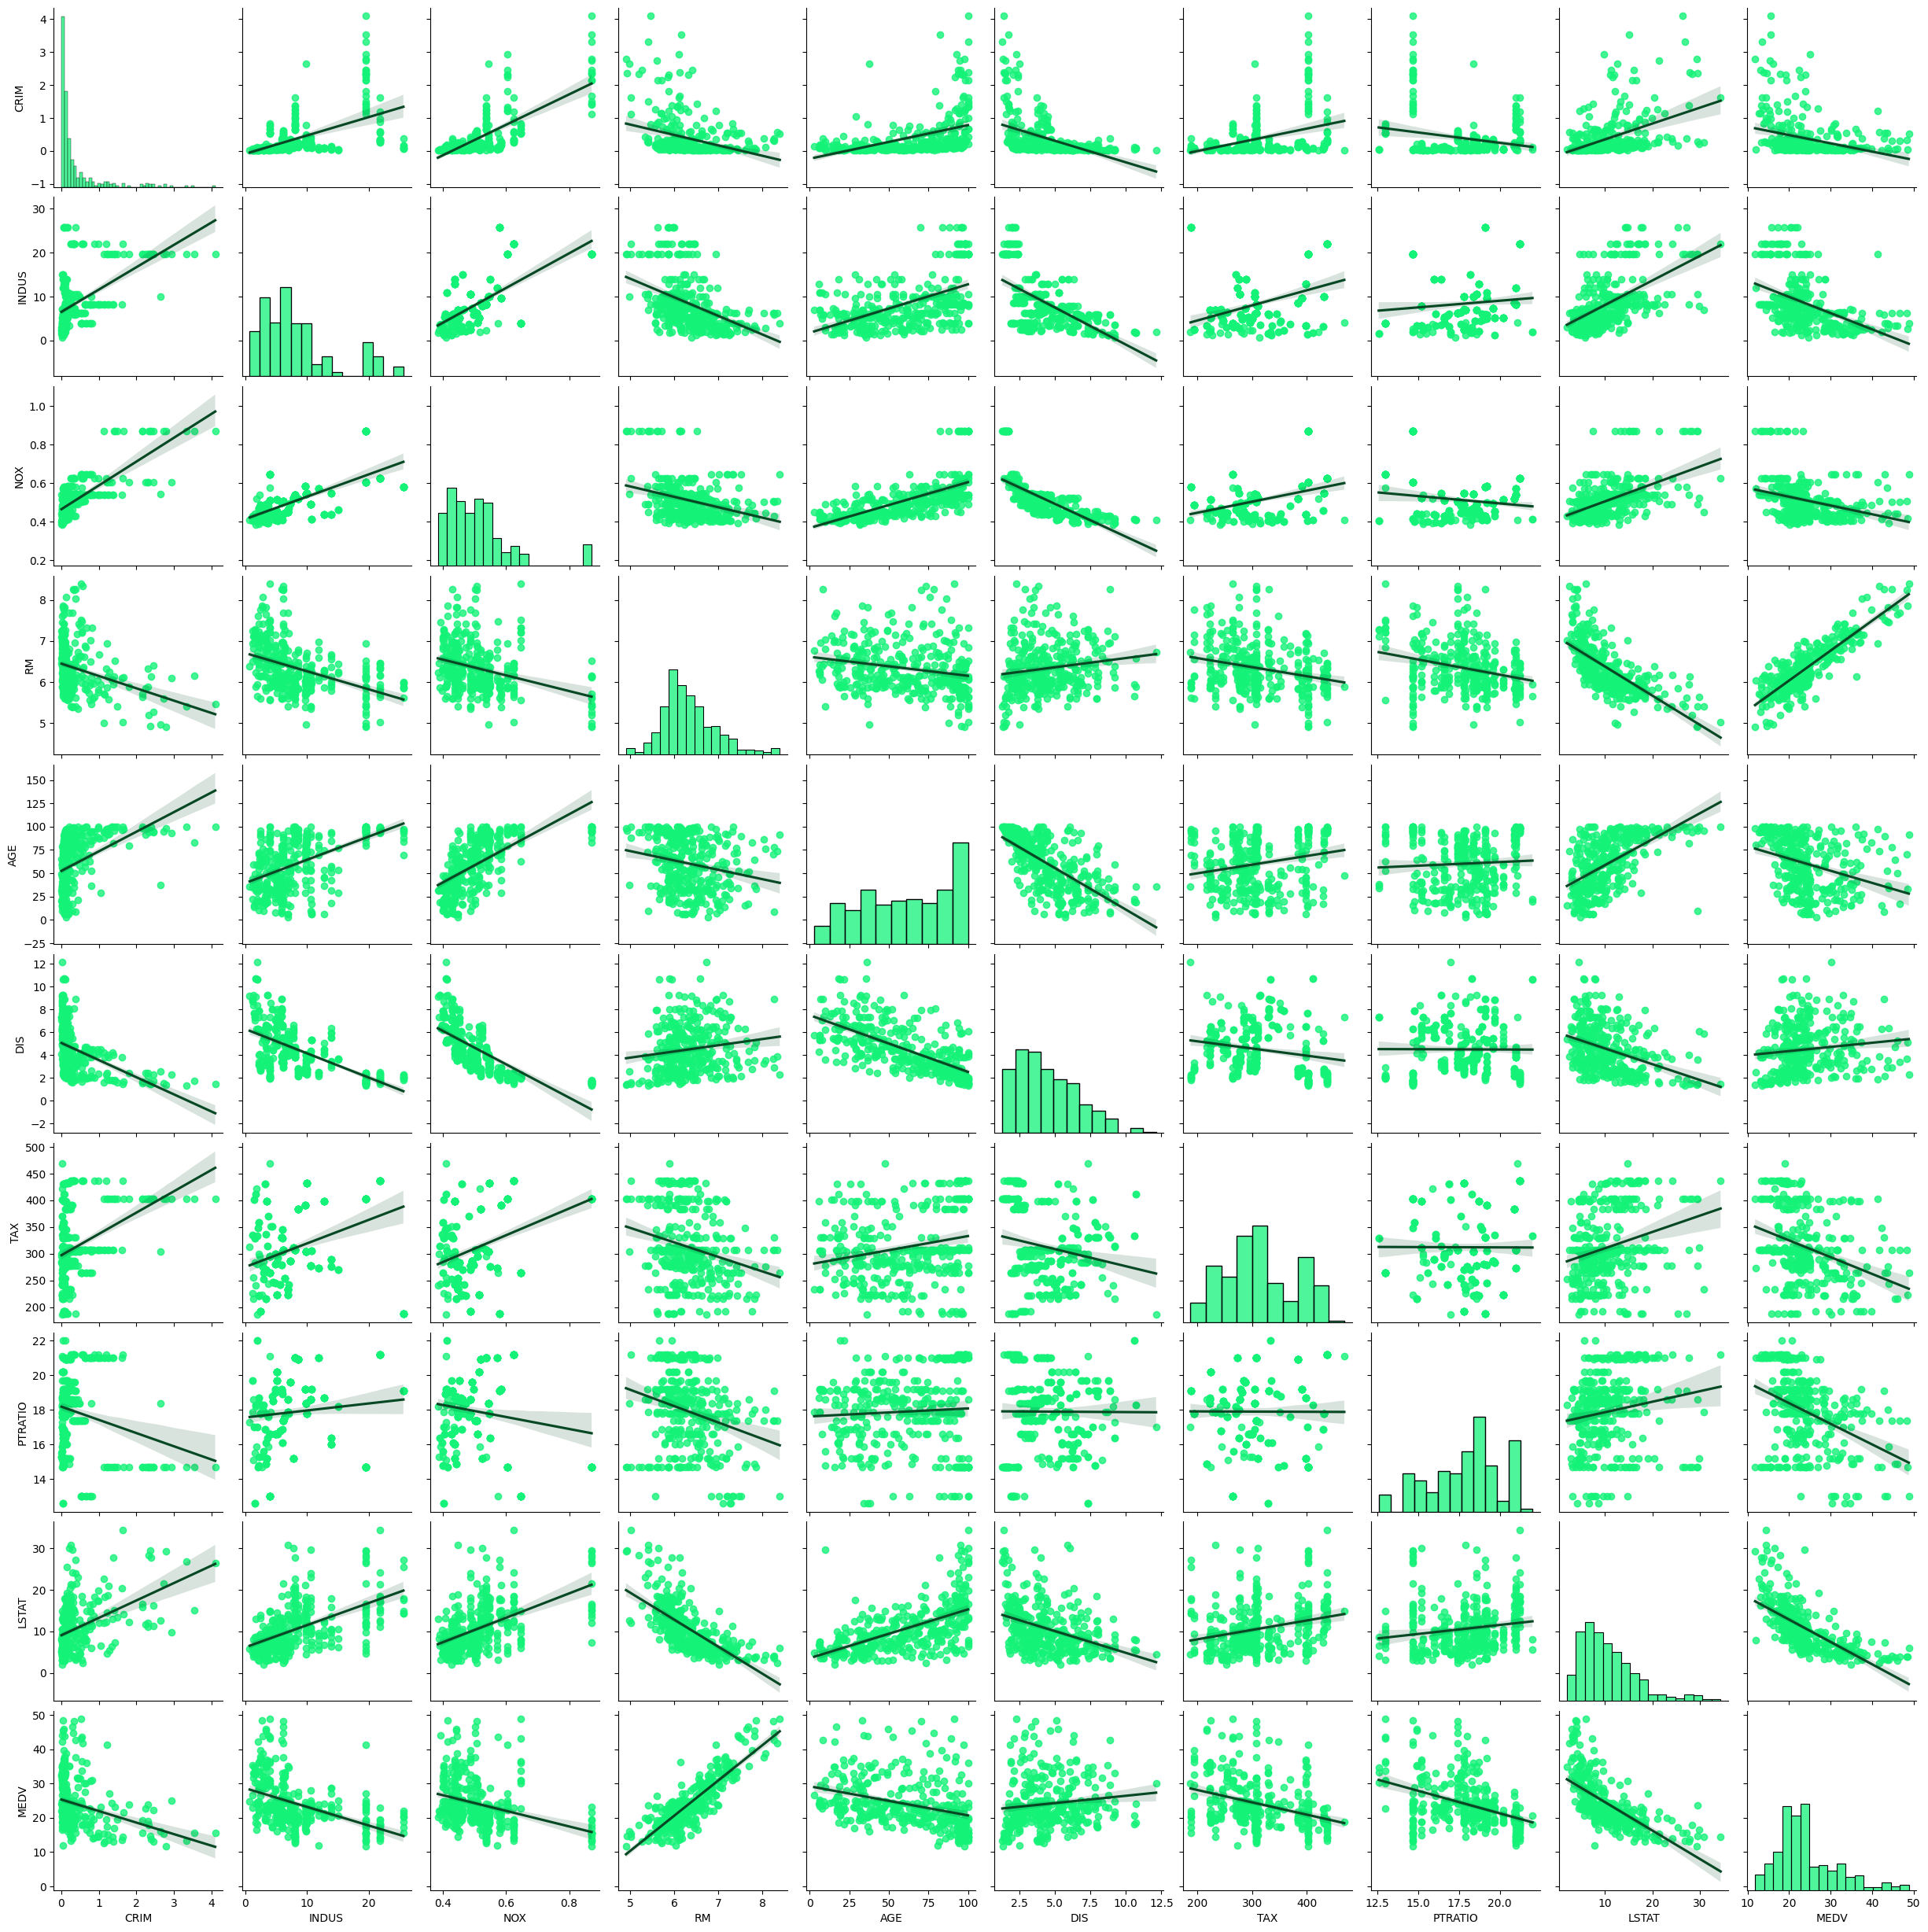

In [15]:
pairplot = sns.pairplot(df, kind = 'reg', plot_kws={'color': '#14F278', 'line_kws': {'color': '#064824'}}, diag_kws={'color': '#14F278'})
plt.show()

In [37]:
df = df[~(df['MEDV'] >= 50.0)]
df.shape

(490, 14)

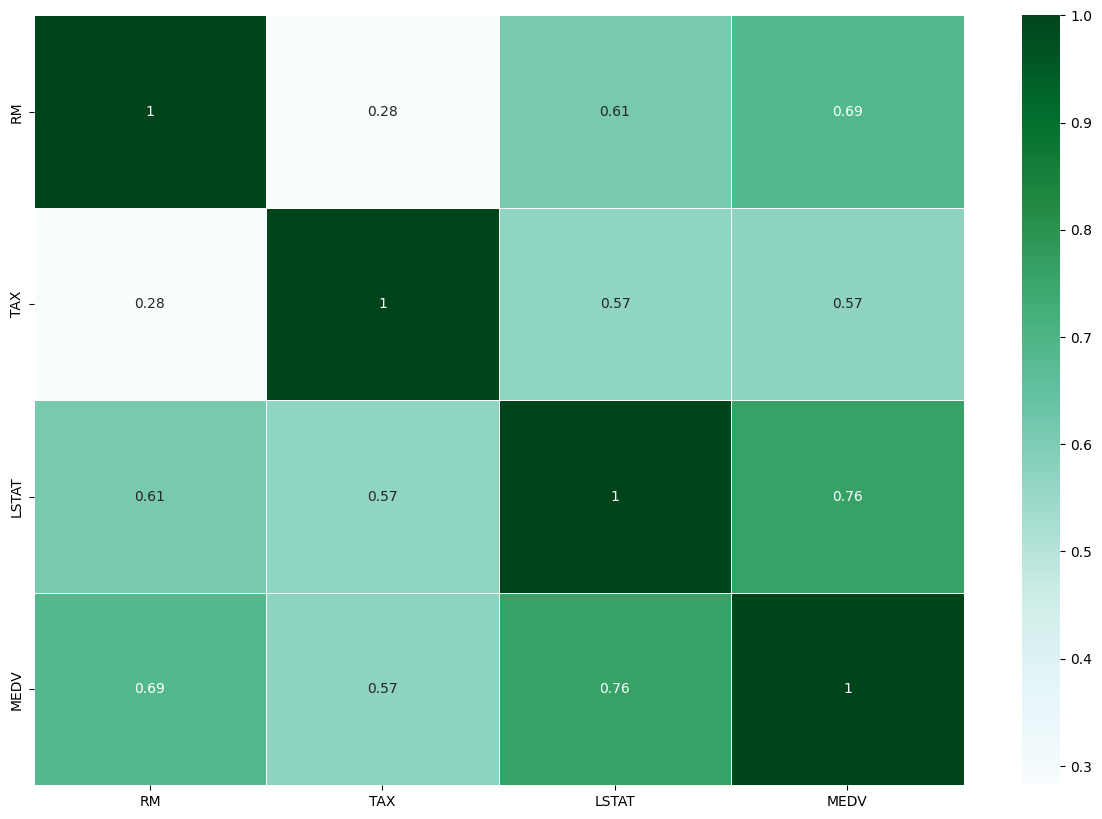

In [61]:
df_REM = df[['RM', 'TAX', 'LSTAT', 'MEDV']]

corr_df = df_REM.corr().abs()

fig, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corr_df, annot = True, cmap = 'BuGn', linewidths = 0.5)
#TODO: Turn the color map into a divergent pallette
plt.show()

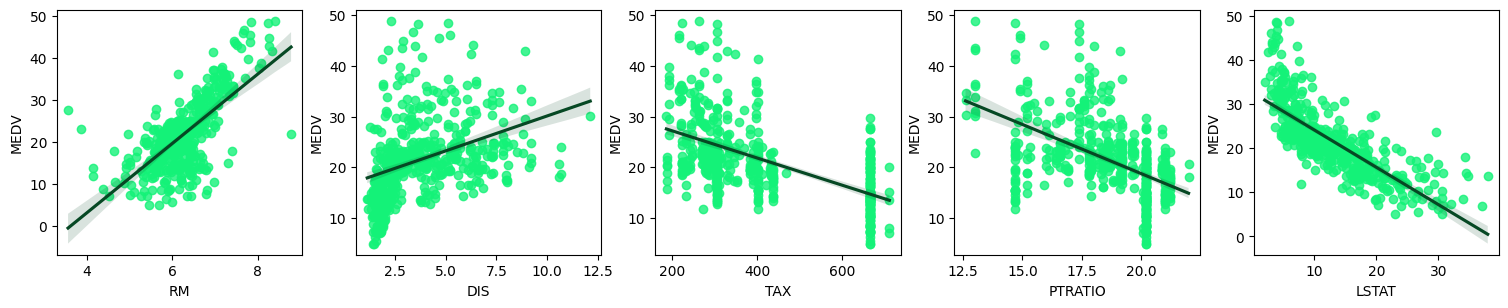

In [ ]:
corr_columns = ['RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (15, 3))

axes = axes.flatten()

for i, column in enumerate(corr_columns):
    sns.regplot(x = df[column], y = df['MEDV'], data = df, ax = axes[i], color = '#14F278', line_kws = dict(color = '#064824'))

plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5)
plt.show()

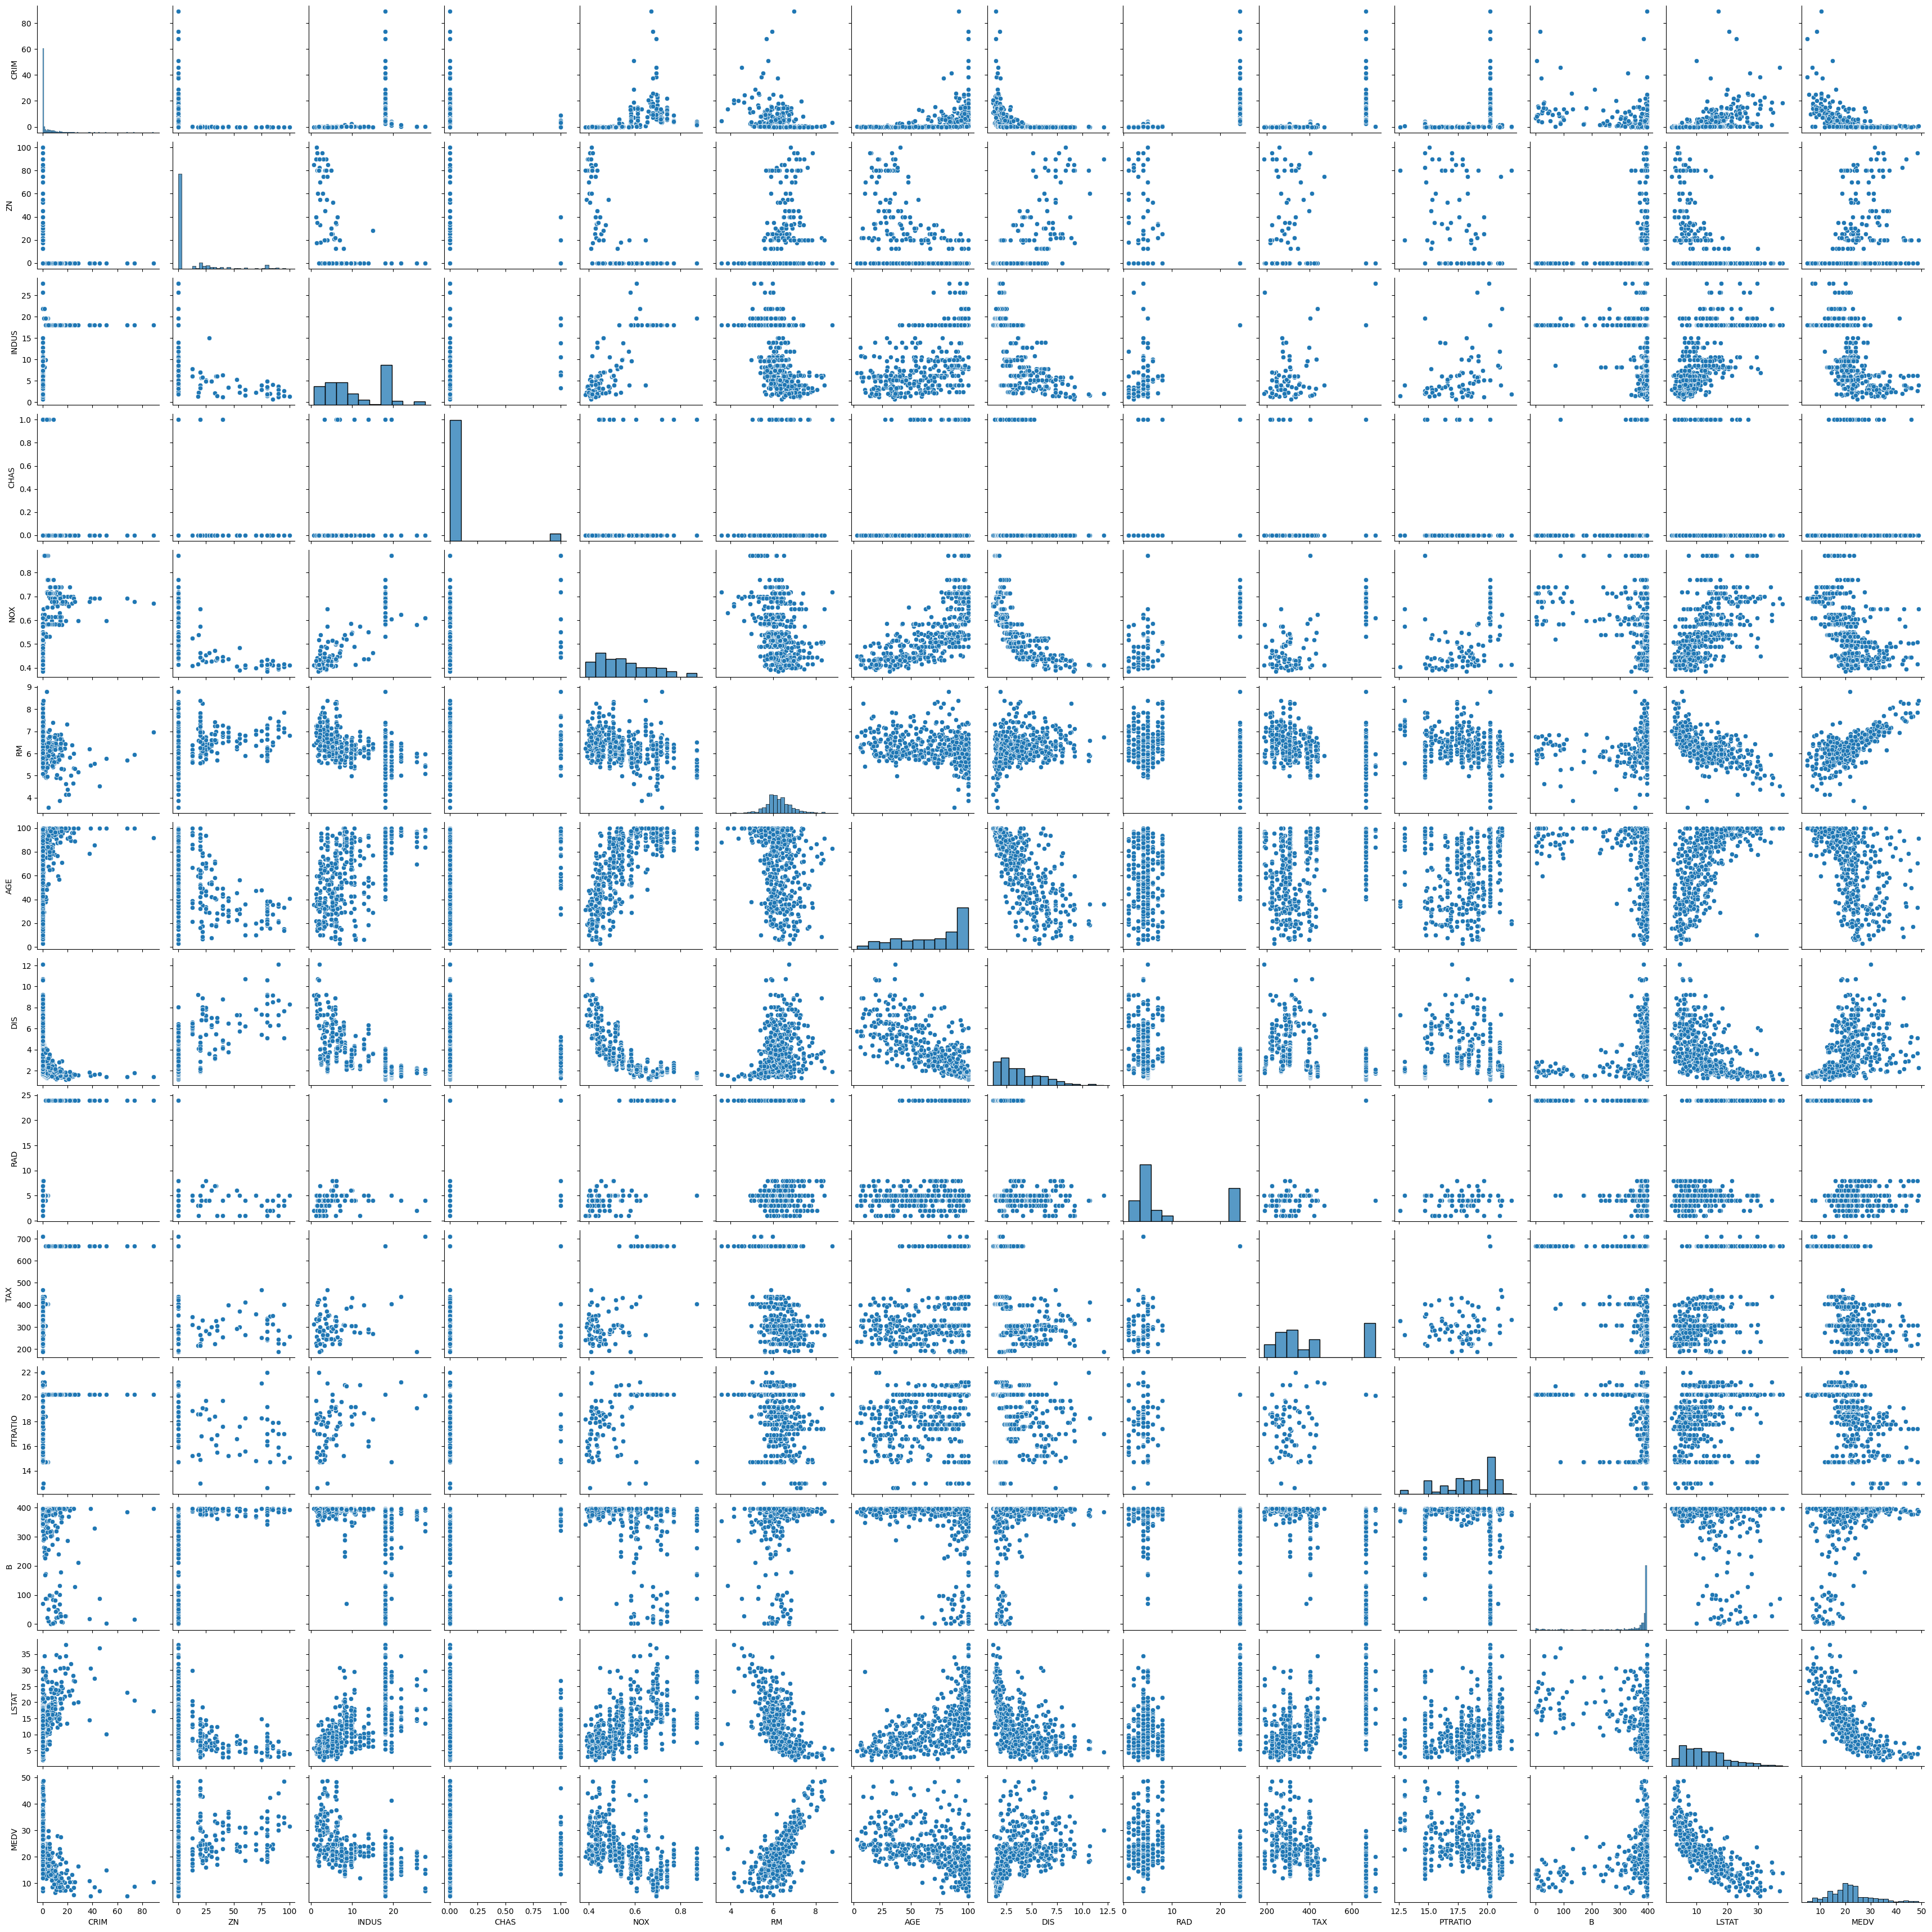

In [ ]:
sns.pairplot(df)

In [ ]:
col_trans = ColumnTransformer(
    [
        ('bin', Binarizer(threshold = 75), ['AGE'])
    ],
    remainder = 'passthrough'
)

col_trans.fit(df)

df_t = col_trans.transform(df)

df_t = pd.DataFrame(df_t, columns = col_trans.get_feature_names_out())

# corr_df_t = df_t.corr()

# fig, ax = plt.subplots(figsize = (15, 10))
# sns.heatmap(corr_df_t, annot = True, cmap = 'BuGn', linewidths = 0.5)
# plt.show()

In [ ]:
X = df[['INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# Initialize an instance of a Linear Regression Model
model = LinearRegression()

# Fit the model to X_train and y_train
model.fit(X_train, y_train)

# With the trained model, make predictions on X_test - store in y_pred
y_pred = model.predict(X_test)

# Compare y_test and y_pred via MAE, MSE and RMSE, and R-Squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean absolute error is {mae:.4f}')
print(f'MSE (test): {mse:.4f}')
print(f'RMSE (test): {mse**0.5:.4f}')
print(f'R-squared is {r2:.4f}')



Mean absolute error is 2.8142
MSE (test): 13.9894
RMSE (test): 3.7402
R-squared is 0.7735


In [65]:
X = df[['RM', 'PTRATIO', 'TAX', 'LSTAT']]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# Initialize an instance of a Gradient Boosting Regression
model = GradientBoostingRegressor()

# Pass Ranges for Hyperparameters
parameters = {'max_depth':        [2,3,4,5,6,7,8,9,10],
              'min_samples_leaf': [5, 10, 20]}  

# Initialise a Grid Search object
# passing the decision tree estimator and the parameter grid values
clf = GridSearchCV(estimator = model, param_grid = parameters, cv=5)

# Fit the Grid Search object to the train data
# At this stage, the model is learning the optimal hyperparameter values by performing the Grid Search
clf.fit(X_train, y_train)

# Once the model's hyperparameters are tuned, we can make predictions
y_pred = clf.predict(X_test)

In [66]:
# Retrieve the optimal hyperparamer values, found by Grid Search CV
best_depth = clf.best_estimator_.max_depth
best_min_samples = clf.best_estimator_.min_samples_leaf

print(f'best estimator: depth {best_depth} and min_samples {best_min_samples}')

best estimator: depth 3 and min_samples 5


In [67]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean absolute error is {mae:.4f}')
print(f'MSE (test): {mse:.4f}')
print(f'RMSE (test): {mse**0.5:.4f}')
print(f'R-squared is {r2:.4f}')


Mean absolute error is 2.0352
MSE (test): 7.7646
RMSE (test): 2.7865
R-squared is 0.8743


Linear regression with Lasso
Bias in the dataset - column B

outliers

use scipy for hypotheses testing


In [68]:
from gradient_boosting_tree.utils import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean absolute error is {mae:.4f}')
print(f'MSE (test): {mse:.4f}')
print(f'RMSE (test): {mse**0.5:.4f}')
print(f'R-squared is {r2:.4f}')


Mean absolute error is 2.0352
MSE (test): 7.7646
RMSE (test): 2.7865
R-squared is 0.8743
